In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("telecom_customer_churn.csv")

In [3]:
df.head(20)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


In [4]:
df["Online Security"]

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039     No
7040     No
7041    Yes
7042    Yes
Name: Online Security, Length: 7043, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [6]:
df.drop(['Customer ID','Churn Category','Churn Reason',
         'Total Refunds','Zip Code','Longitude','Latitude','City'],axis=1, inplace = True)

In [7]:
df

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,...,Yes,One Year,Yes,Credit Card,65.60,593.30,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,...,No,Month-to-Month,No,Credit Card,-4.00,542.40,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,...,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,0,13,Offer D,Yes,46.68,No,...,Yes,One Year,No,Credit Card,55.15,742.90,0,606.84,1349.74,Stayed
7039,Male,40,Yes,0,1,22,Offer D,Yes,16.20,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0,356.40,2230.10,Churned
7040,Male,22,No,0,0,2,Offer E,Yes,18.62,No,...,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0,37.24,129.99,Joined
7041,Male,21,Yes,0,5,67,Offer A,Yes,2.12,No,...,Yes,Two Year,No,Credit Card,67.85,4627.65,0,142.04,4769.69,Stayed


<AxesSubplot:>

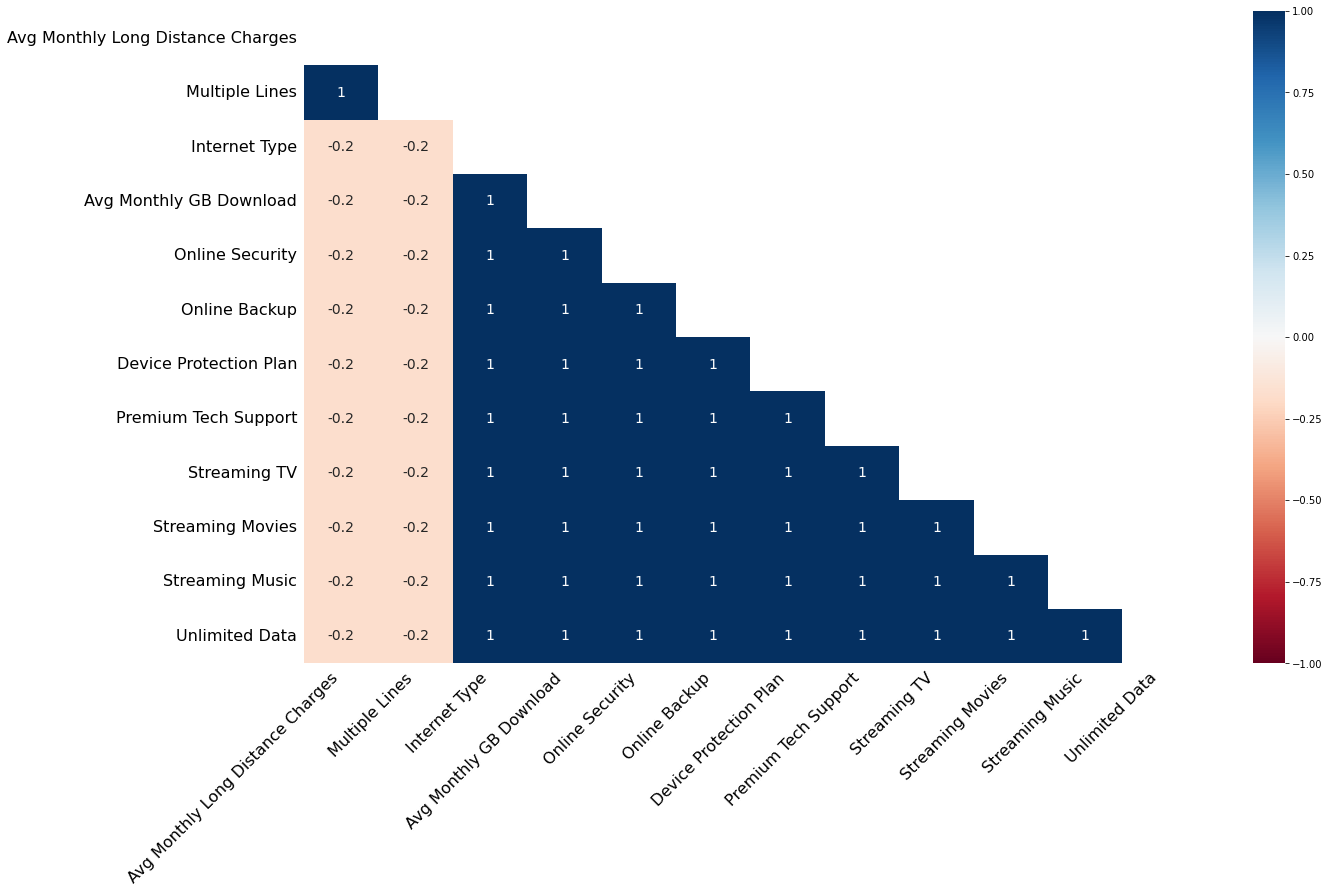

In [8]:
msno.heatmap(df)

<AxesSubplot:>

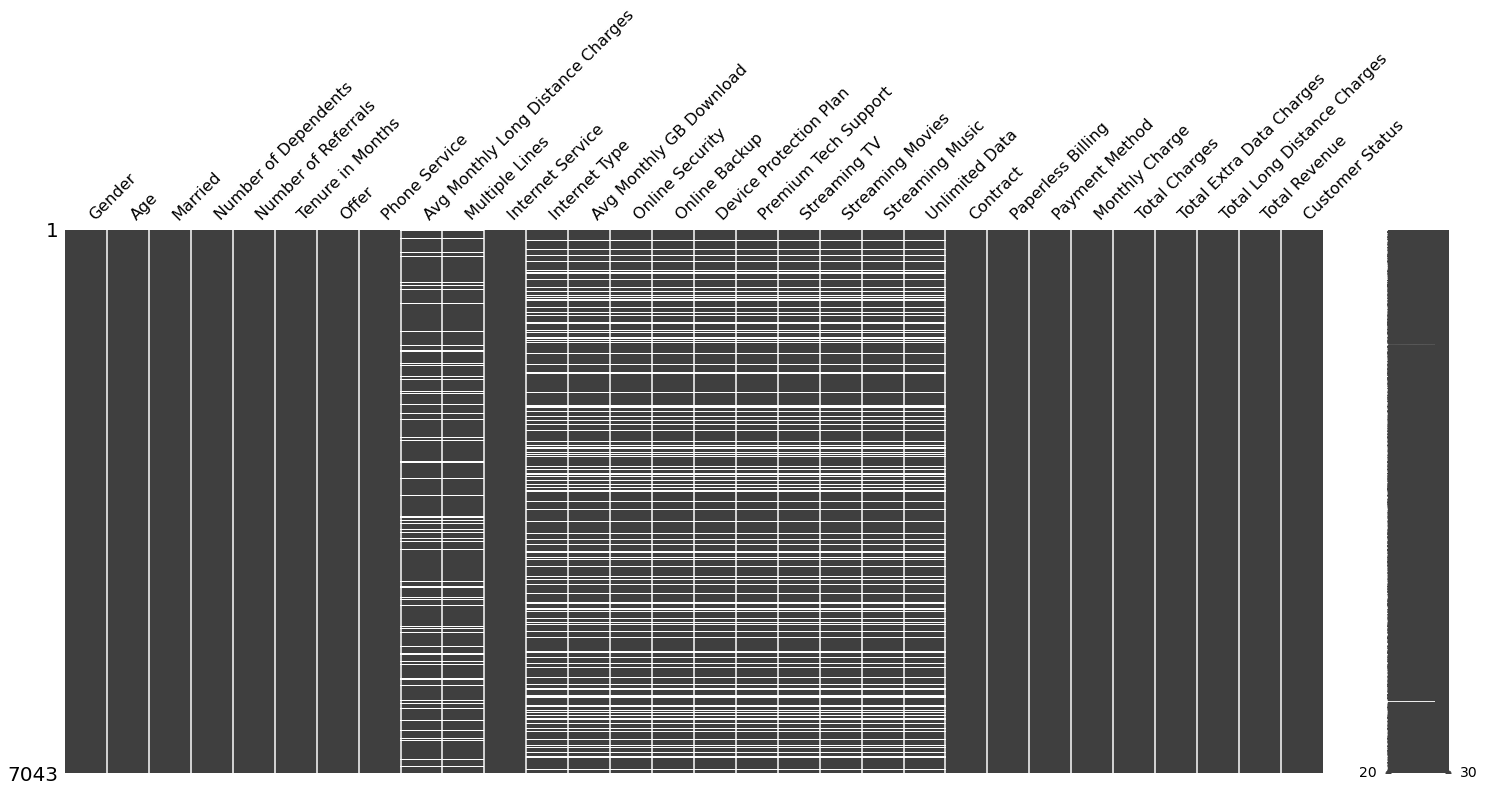

In [9]:
msno.matrix(df)

In [10]:
missing_values = list(df.isna().sum())
# missing values is a list of the number of missing values in each column

cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Making a custom dataframe from dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
Missing Values,0,682,682,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526


In [11]:
df.fillna(method='ffill', inplace=True)

In [12]:
missing_values = list(df.isna().sum())
# missing values is a list of the number of missing values in each column

cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Making a custom dataframe from dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others
Missing Values,0


<AxesSubplot:>

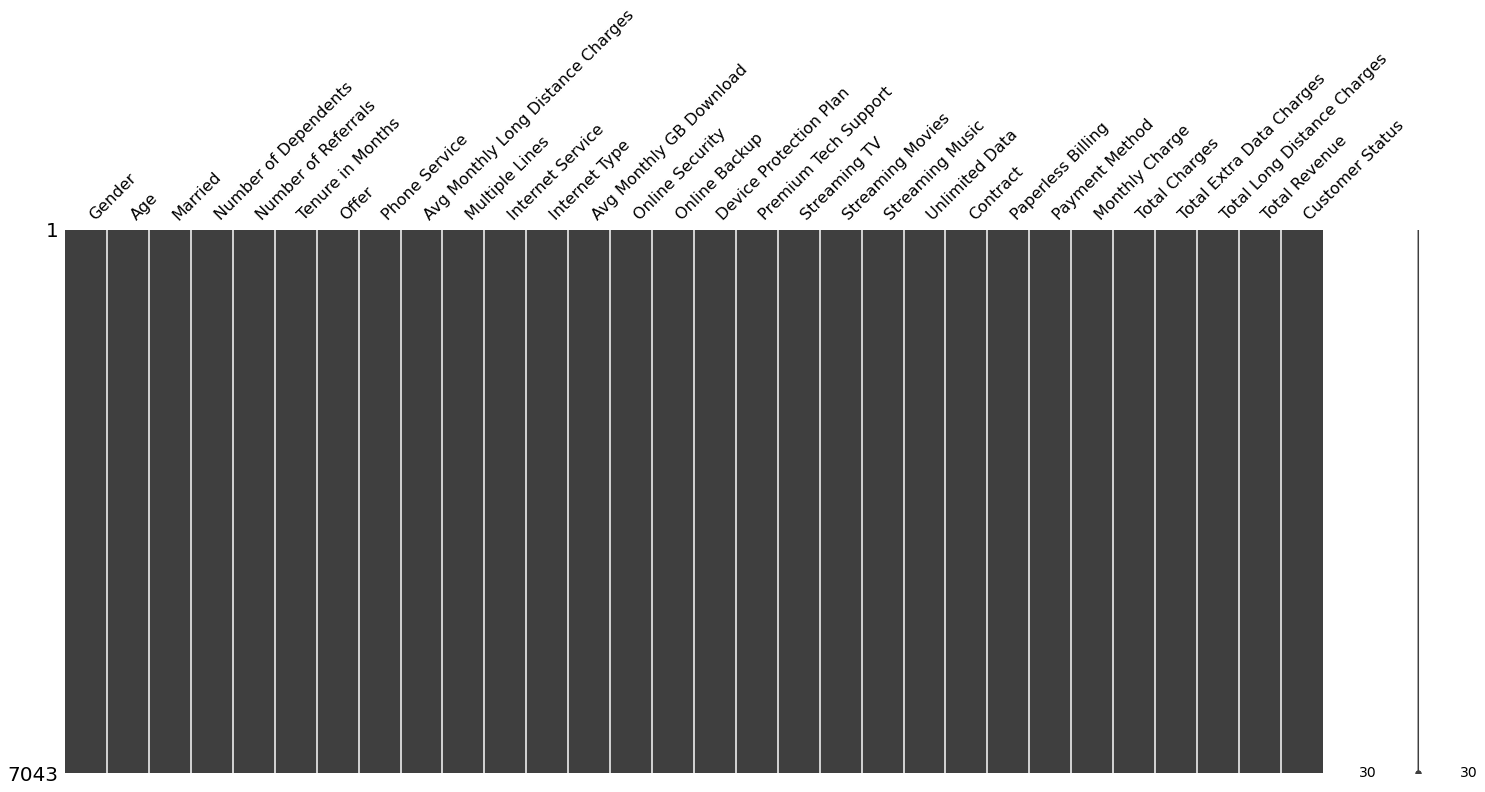

In [13]:
msno.matrix(df)

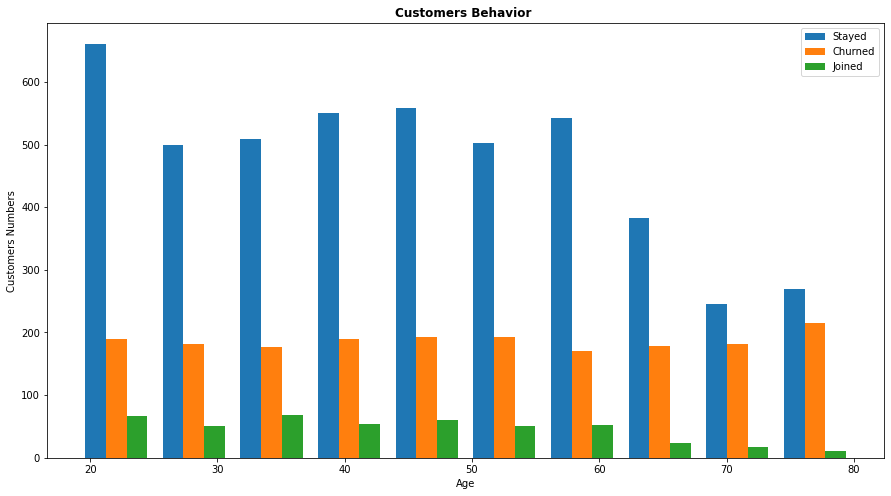

In [14]:
plt.figure(figsize=(15,8))
Customer_Stayed=df[df['Customer Status']=='Stayed'].Age
Customer_Churned=df[df['Customer Status']=='Churned'].Age
Customer_Joined=df[df['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined],label=['Stayed','Churned','Joined'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend()

<AxesSubplot:xlabel='Customer Status'>

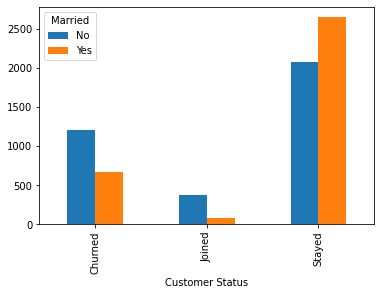

In [15]:
pd.crosstab(df['Customer Status'], df['Married']).plot(kind='bar')

In [16]:
label_Encoder = LabelEncoder()

#using label encoder for features with only two unique values
for col in df.columns[0:]:
    if len(list(df[col].unique())) == 2:
        label_Encoder.fit(df[col])
        df[col] = label_Encoder.transform(df[col])
        
#using label encoder for object features  
for col in df.columns[0:]:
    if df[col].dtype == 'object':
        label_Encoder.fit(df[col])
        df[col] = label_Encoder.transform(df[col])

In [17]:
df = pd.get_dummies(data=df, columns=['Offer'])
df

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Offer_0,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5
0,0,37,1,0,2,9,1,42.39,0,1,...,0,381.51,974.81,2,1,0,0,0,0,0
1,1,46,0,0,0,9,1,10.69,1,1,...,10,96.21,610.28,2,1,0,0,0,0,0
2,1,50,0,0,0,4,1,33.65,0,1,...,0,134.60,415.45,0,0,0,0,0,0,1
3,1,78,1,0,1,13,1,27.82,0,1,...,0,361.66,1599.51,0,0,0,0,0,1,0
4,0,75,1,0,3,3,1,7.38,0,1,...,0,22.14,289.54,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,20,0,0,0,13,1,46.68,0,1,...,0,606.84,1349.74,2,0,0,0,0,1,0
7039,1,40,1,0,1,22,1,16.20,1,1,...,0,356.40,2230.10,0,0,0,0,0,1,0
7040,1,22,0,0,0,2,1,18.62,0,1,...,0,37.24,129.99,1,0,0,0,0,0,1
7041,1,21,1,0,5,67,1,2.12,0,1,...,0,142.04,4769.69,2,0,1,0,0,0,0


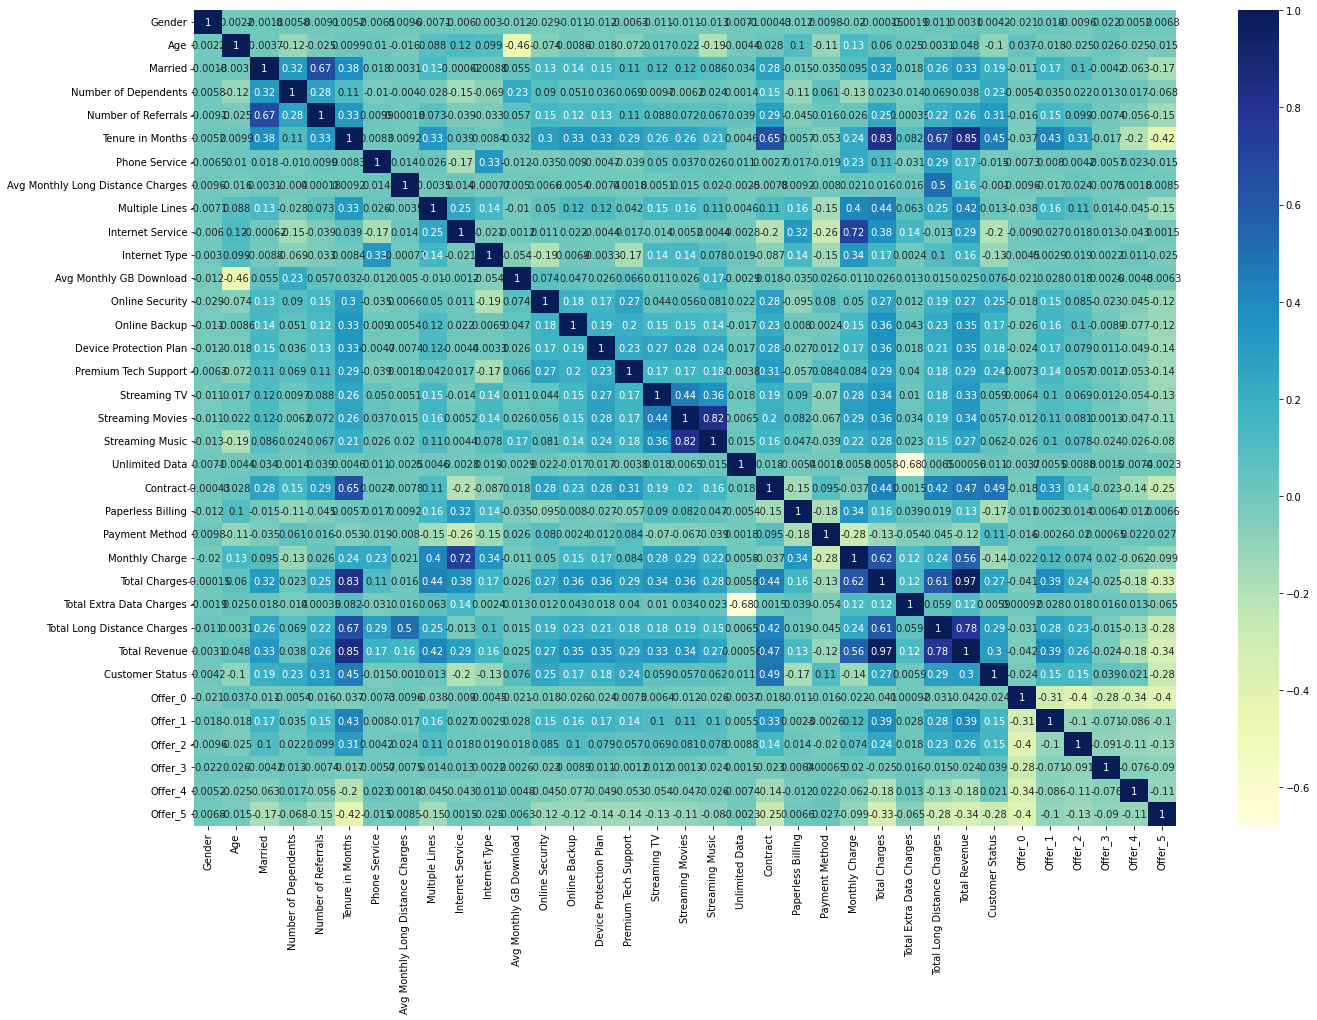

In [18]:
df.corr()
plt.figure(figsize=(22,15))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [19]:
drop_col = ['Customer Status','Tenure in Months','Internet Service','Total Charges','Monthly Charge','Streaming Movies','Number of Referrals','Total Extra Data Charges',"Total Long Distance Charges"]
x = df.drop(drop_col, axis = 1)
y = df['Customer Status']

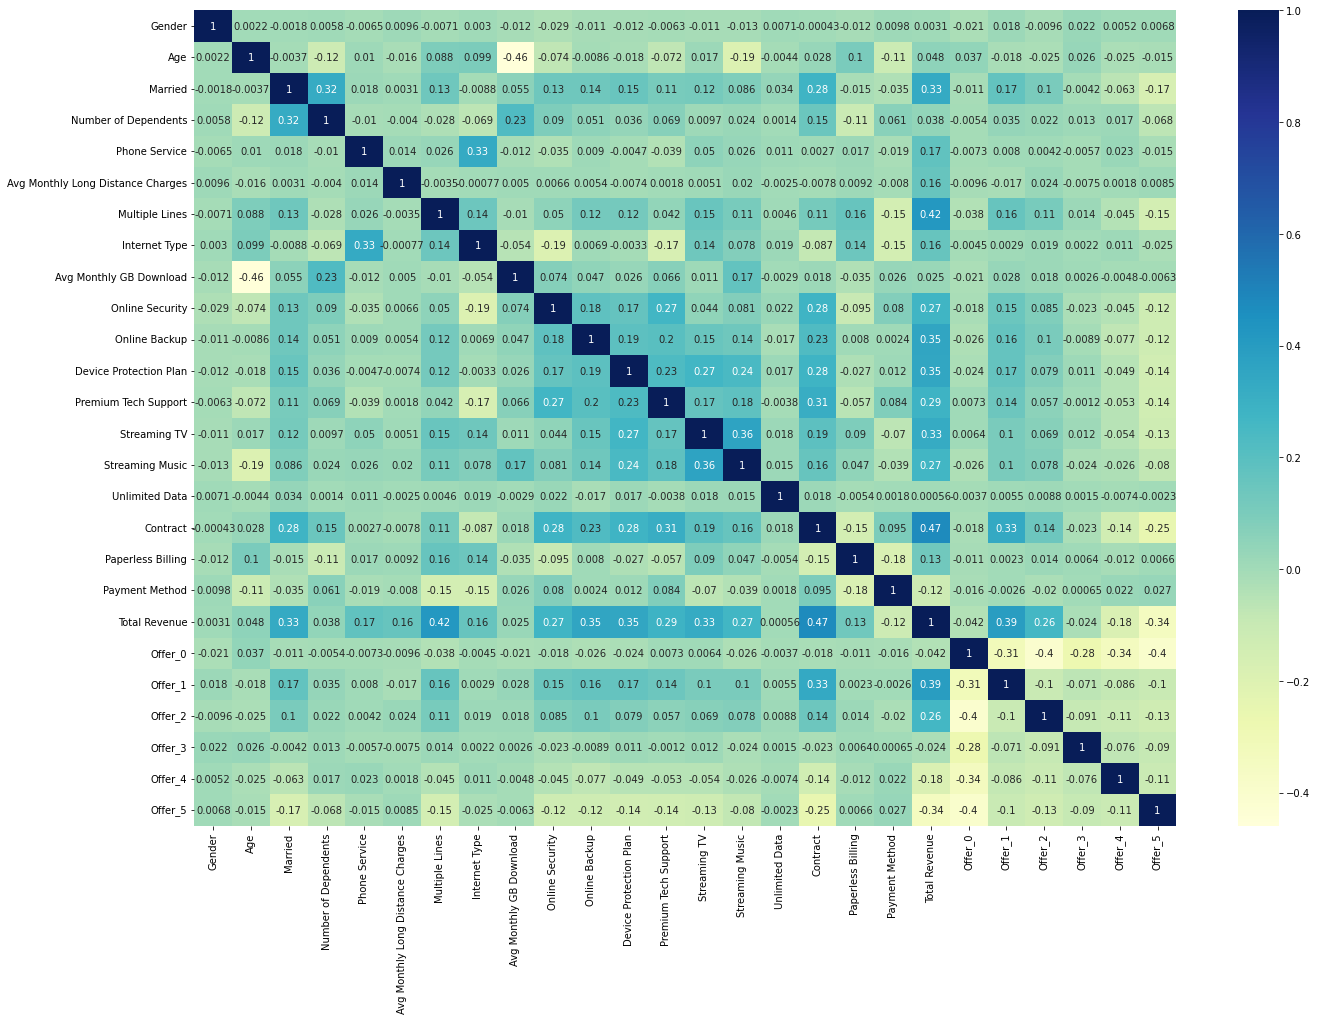

In [20]:
x.corr()
plt.figure(figsize=(22,15))
dataplot = sns.heatmap(x.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int32  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int32  
 3   Number of Dependents               7043 non-null   int64  
 4   Phone Service                      7043 non-null   int32  
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   int32  
 7   Internet Type                      7043 non-null   int32  
 8   Avg Monthly GB Download            7043 non-null   float64
 9   Online Security                    7043 non-null   int32  
 10  Online Backup                      7043 non-null   int32  
 11  Device Protection Plan             7043 non-null   int32

In [22]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [23]:
from sklearn.preprocessing import StandardScaler


In [28]:
scaler = StandardScaler()
X_train[['Age','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Total Revenue']] = StandardScaler().fit_transform(X_train[['Age','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Total Revenue']])
X_test[['Age','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Total Revenue']] = StandardScaler().fit_transform(X_test[['Age','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Total Revenue']])

In [31]:
X_train.describe()

,Gender,Age,Married,Number of Dependents,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,...,Contract,Paperless Billing,Payment Method,Total Revenue,Offer_0,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5
count,4930.000000,4.930000e+03,4930.000000,4930.000000,4930.000000,4.930000e+03,4930.000000,4930.000000,4.930000e+03,4930.000000,...,4930.000000,4930.000000,4930.000000,4.930000e+03,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,0.500811,1.787166e-16,0.478905,0.470183,0.901217,1.109773e-16,0.465112,1.402637,-1.082749e-16,0.360041,...,0.749087,0.587424,0.503854,-3.098716e-17,0.556795,0.068763,0.115822,0.057606,0.085396,0.115619
std,0.500050,1.000101e+00,0.499605,0.970671,0.298401,1.000101e+00,0.498832,0.737892,1.000101e+00,0.480061,...,0.845863,0.492348,0.599998,1.000101e+00,0.496814,0.253076,0.320043,0.233021,0.279498,0.319800
min,0.000000,-1.625159e+00,0.000000,0.000000,0.000000,-1.716413e+00,0.000000,0.000000,-1.235064e+00,0.000000,...,0.000000,0.000000,0.000000,-1.048685e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.558580e-01,0.000000,0.000000,1.000000,-8.617691e-01,0.000000,1.000000,-6.760377e-01,0.000000,...,0.000000,0.000000,0.000000,-8.485835e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-2.737987e-02,0.000000,0.000000,1.000000,1.156149e-02,0.000000,2.000000,-2.694729e-01,0.000000,...,0.000000,1.000000,0.000000,-3.146782e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.010983e-01,1.000000,0.000000,1.000000,8.566860e-01,1.000000,2.000000,1.879125e-01,1.000000,...,2.000000,1.000000,1.000000,6.143098e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.984639e+00,1.000000,8.000000,1.000000,1.736716e+00,1.000000,2.000000,2.983046e+00,1.000000,...,2.000000,1.000000,2.000000,3.190186e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
from sklearn import tree
Model = tree.DecisionTreeClassifier()
Model.fit(X_train, y_train)
tree.DecisionTreeClassifier()

DecisionTreeClassifier()

In [44]:
y_predict_train = Model.predict(X_train)
y_predict_test = Model.predict(X_test)
from sklearn.metrics import accuracy_score
print('training accuracy = ', accuracy_score(y_train, y_predict_train))
print('testibng accuracy = ', accuracy_score(y_test, y_predict_test))

training accuracy =  1.0
testibng accuracy =  0.7321344060577378


In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight="balanced")
fitted = lr.fit(X_train, y_train)

In [49]:
y_predd = lr.predict(X_test)
accuracy_score(y_test, y_predd)

0.7079981069569332

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred = model.predict(X_test)
y_pred
accuracy_score(y_test, y_pred)

0.7406530998580217